In [5]:
import numpy as np
import math
from scipy import misc

# Criptografía con matrices, el cifrado de Hill
### np.array, np.arange, reshape
En primer lugar, se asocia cada letra del alfabeto con un número. La forma más sencilla de hacerlo es con la asociación natural ordenada, aunque podrían realizarse otras asociaciones diferentes.
https://culturacientifica.com/2017/01/11/criptografia-matrices-cifrado-hill/

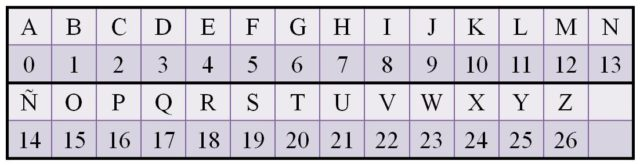
## Arreglo para representar la asociación

In [148]:
abecedario_cadena = "abcdefghijklmnñopqrstuvwxyz";
abecedario = np.array(list(abecedario_cadena))
indices = np.arange(abecedario.size)
asociacion_natural = np.stack((abecedario,indices), axis=1)
print(asociacion_natural)

[['a' '0']
 ['b' '1']
 ['c' '2']
 ['d' '3']
 ['e' '4']
 ['f' '5']
 ['g' '6']
 ['h' '7']
 ['i' '8']
 ['j' '9']
 ['k' '10']
 ['l' '11']
 ['m' '12']
 ['n' '13']
 ['ñ' '14']
 ['o' '15']
 ['p' '16']
 ['q' '17']
 ['r' '18']
 ['s' '19']
 ['t' '20']
 ['u' '21']
 ['v' '22']
 ['w' '23']
 ['x' '24']
 ['y' '25']
 ['z' '26']]


## Matriz clave
En el cifrado de Hill se utiliza una matriz cuadrada de números A como clave, la cual determina la transformación lineal Y = A ∙ X, donde Y, X son vectores columna y A y X se multiplican con la multiplicación de matrices (véase la siguiente imagen).
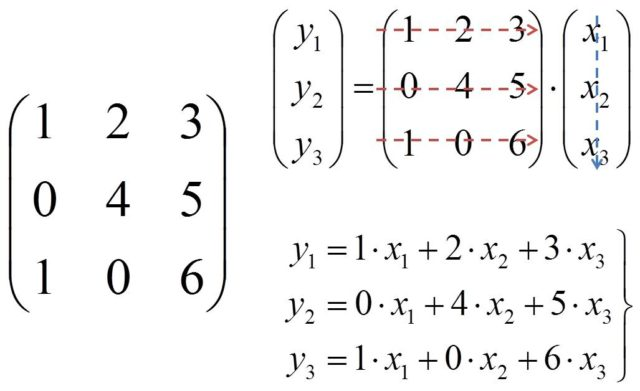

In [149]:
matriz_clave = np.array([1,2,3,0,4,5,1,0,6]).reshape(3,3)
print(matriz_clave)

[[1 2 3]
 [0 4 5]
 [1 0 6]]


## Mensaje a cifrar
Supongamos que el mensaje que se quiere enviar encriptado es
“CUADERNO DE CULTURA CIENTIFICA”

In [150]:
mensaje_a_cifrar = "cuaderno de cultura cientifica"
mensaje_a_cifrar_arreglo = np.array(list(mensaje_a_cifrar.replace(' ','')))
print(mensaje_a_cifrar_arreglo)

['c' 'u' 'a' 'd' 'e' 'r' 'n' 'o' 'd' 'e' 'c' 'u' 'l' 't' 'u' 'r' 'a' 'c'
 'i' 'e' 'n' 't' 'i' 'f' 'i' 'c' 'a']


## Transcripción numérica
Teniendo en cuanta la tabla de sustitución anterior el mensaje es:

In [151]:
def transcripcion(mensaje_tipo_arreglo):
    lista_resultado = []
    for letra in mensaje_tipo_arreglo:
        lista_resultado.append(abecedario_cadena.index(letra))
    return lista_resultado

mensaje_transcrito = transcripcion(mensaje_a_cifrar_arreglo);
print(asociacion_natural[mensaje_transcrito])

[['c' '2']
 ['u' '21']
 ['a' '0']
 ['d' '3']
 ['e' '4']
 ['r' '18']
 ['n' '13']
 ['o' '15']
 ['d' '3']
 ['e' '4']
 ['c' '2']
 ['u' '21']
 ['l' '11']
 ['t' '20']
 ['u' '21']
 ['r' '18']
 ['a' '0']
 ['c' '2']
 ['i' '8']
 ['e' '4']
 ['n' '13']
 ['t' '20']
 ['i' '8']
 ['f' '5']
 ['i' '8']
 ['c' '2']
 ['a' '0']]


## Transformaciones lineales
Como la transformación lineal es de orden 3, vamos a agrupar los números en grupos de tres, en ternas, sobre las que luego aplicaremos la transformación lineal.

In [152]:
grupo_ternas = np.array(mensaje_transcrito).reshape(-1,3)
print(grupo_ternas)

[[ 2 21  0]
 [ 3  4 18]
 [13 15  3]
 [ 4  2 21]
 [11 20 21]
 [18  0  2]
 [ 8  4 13]
 [20  8  5]
 [ 8  2  0]]


A continuación, vamos a transformar las ternas de números anteriores, mediante la transformación lineal dada por la clave, en nuevas ternas, que serán el mensaje numérico cifrado:
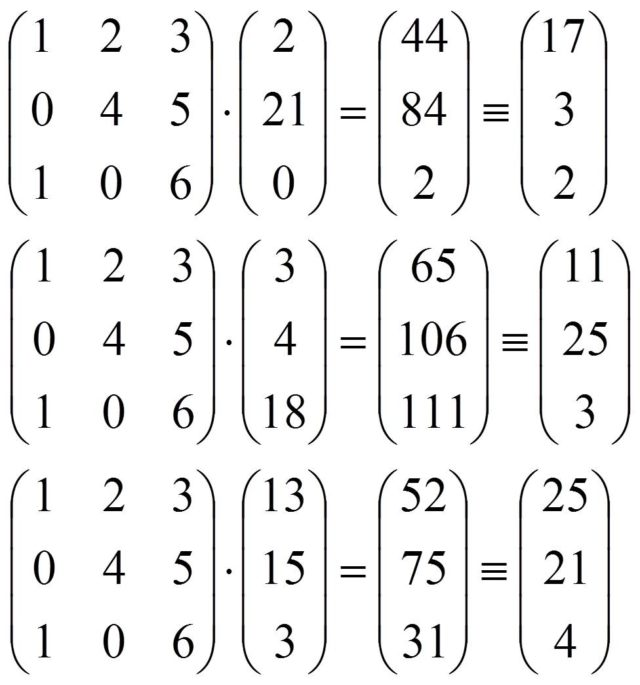
Aunque la transformación lineal de la terna (2, 21, 0) es inicialmente (44, 84, 2), como estamos trabajando con enteros módulo 27, esta terna se convierte en (17, 3, 2), ya que 44 = 1 x 27 + 17 y 84 = 3 x 27 + 3. E igual para el resto.

In [153]:
def transformar_ternas(ternas, clave):
    lista_resultado = []
    for terna in ternas:
        print(clave.dot(terna))
        lista_resultado.append(clave.dot(terna) % 27)
    return np.array(lista_resultado)

ternas_cifradas = transformar_ternas(grupo_ternas, matriz_clave)

print("\nTrasformación final:")
print(ternas_cifradas)

[44 84  2]
[ 65 106 111]
[52 75 31]
[ 71 113 130]
[114 185 137]
[24 10 30]
[55 81 86]
[51 57 50]
[12  8  8]

Trasformación final:
[[17  3  2]
 [11 25  3]
 [25 21  4]
 [17  5 22]
 [ 6 23  2]
 [24 10  3]
 [ 1  0  5]
 [24  3 23]
 [12  8  8]]


## Generar mensaje cifrado
Para generar el mensaje cifrado redefinimos la dimension de las ternas cifradas y transcribimos el mensaje:

In [154]:
indices_mensaje_cifrado = ternas_cifradas.reshape(1,-1)[0]
print("\nIndices generados:")
print(indices_mensaje_cifrado)

def transcripcion_inversa(indices_tipo_arreglo):
    cifrado = ""
    for indice in indices_tipo_arreglo:
        cifrado += abecedario[int(indice)]
    return cifrado

print("\nMensaje cifrado:")
print(asociacion_natural[indices_mensaje_cifrado])

mensaje_cifrado = asociacion_natural[indices_mensaje_cifrado][:,0].flatten()
print("\nMensaje cifrado:")
print("".join(mensaje_cifrado))



Indices generados:
[17  3  2 11 25  3 25 21  4 17  5 22  6 23  2 24 10  3  1  0  5 24  3 23
 12  8  8]

Mensaje cifrado:
[['q' '17']
 ['d' '3']
 ['c' '2']
 ['l' '11']
 ['y' '25']
 ['d' '3']
 ['y' '25']
 ['u' '21']
 ['e' '4']
 ['q' '17']
 ['f' '5']
 ['v' '22']
 ['g' '6']
 ['w' '23']
 ['c' '2']
 ['x' '24']
 ['k' '10']
 ['d' '3']
 ['b' '1']
 ['a' '0']
 ['f' '5']
 ['x' '24']
 ['d' '3']
 ['w' '23']
 ['m' '12']
 ['i' '8']
 ['i' '8']]

Mensaje cifrado:
qdclydyueqfvgwcxkdbafxdwmii


# Descifrar el mensaje
Para poder descodificar los mensajes cifrados mediante el método de Hill se necesita que la matriz de la transformación lineal utilizada, la clave, sea una matriz inversible. 
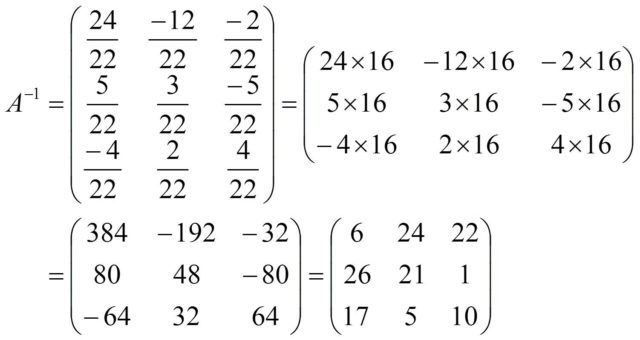
La matriz de nuestro ejemplo lo es, puesto que su determinante es no nulo, |A| = 22. Además, la matriz inversa de A, que es la necesaria para descodificar un mensaje cifrado, es

In [155]:
print("\nMatriz clave:")
print(matriz_clave)
determinante = int(np.linalg.det(matriz_clave))
print("\nDeterminante:")
print(determinante)

matriz_clave_inversa = np.linalg.inv(matriz_clave)
print("\nMatriz inversa:")
print(matriz_clave_inversa)


Matriz clave:
[[1 2 3]
 [0 4 5]
 [1 0 6]]

Determinante:
22

Matriz inversa:
[[ 1.09090909 -0.54545455 -0.09090909]
 [ 0.22727273  0.13636364 -0.22727273]
 [-0.18181818  0.09090909  0.18181818]]


### Matriz inversa en modulo equivalente
Estamos trabajando con los enteros módulo 27 y vamos a transformar la matriz inversa anterior en una matriz con números enteros módulo 27. Para empezar se necesita el inverso del número 22.

Se ve fácilmente que 22x16 = 352, que es igual a 1 en módulo 27, luego 1/22 = 16. Y la matriz inversa se transforma, módulo 27, en

In [156]:
# 22 x A = B (tal que B%22 = 0 y B%27 = 1)
# 22x16 = 352
# 22x16 = 1(en mod 27)
# 16 = 1 (en mod 27) / 22

def equivalente(mod,det,limit):
    valor = 0
    for i in range(1,limit):
        if (i%mod == 1):
            if (i%det == 0):
                valor = i
                break
    return valor/det

determinante_equivalente = equivalente(abecedario.size,determinante,400) # 16

matriz_clave_inversa_sin_determinante = matriz_clave_inversa*determinante
matriz_clave_inversa_con_equivalente = matriz_clave_inversa_sin_determinante * determinante_equivalente
matriz_clave_inversa_equivalente = matriz_clave_inversa_con_equivalente % 27
print("Matriz equivalente:")
print(matriz_clave_inversa_equivalente)


Matriz equivalente:
[[ 6. 24. 22.]
 [26. 21.  1.]
 [17.  5. 10.]]


## Decodificación
Para descodificar el mensaje hay que utilizar el mismo método anterior, el cifrado de Hill, pero utilizando como clave la matriz inversa A-1 (módulo 27) de la matriz A de codificación.

In [157]:
mensaje_a_descifrar_arreglo = np.array(list('qdclydyueqfvgwcxkdbafxdwmii'))
print(mensaje_a_descifrar_arreglo)

['q' 'd' 'c' 'l' 'y' 'd' 'y' 'u' 'e' 'q' 'f' 'v' 'g' 'w' 'c' 'x' 'k' 'd'
 'b' 'a' 'f' 'x' 'd' 'w' 'm' 'i' 'i']


In [158]:
mensaje_oculto_transcrito = transcripcion(mensaje_a_descifrar_arreglo);
print(mensaje_oculto_transcrito)

[17, 3, 2, 11, 25, 3, 25, 21, 4, 17, 5, 22, 6, 23, 2, 24, 10, 3, 1, 0, 5, 24, 3, 23, 12, 8, 8]


In [159]:
grupo_oculto_ternas = np.array(mensaje_oculto_transcrito).reshape(-1,3)
print(grupo_oculto_ternas)

[[17  3  2]
 [11 25  3]
 [25 21  4]
 [17  5 22]
 [ 6 23  2]
 [24 10  3]
 [ 1  0  5]
 [24  3 23]
 [12  8  8]]


In [160]:
nuevas_ternas_cifradas = transformar_ternas(grupo_oculto_ternas, matriz_clave_inversa_equivalente)
print("\nTrasformación final:")
print(nuevas_ternas_cifradas)

[218. 507. 324.]
[732. 814. 342.]
[ 742. 1095.  570.]
[706. 569. 534.]
[632. 641. 237.]
[450. 837. 488.]
[116.  31.  67.]
[722. 710. 653.]
[440. 488. 324.]

Trasformación final:
[[ 2. 21.  0.]
 [ 3.  4. 18.]
 [13. 15.  3.]
 [ 4.  2. 21.]
 [11. 20. 21.]
 [18.  0.  2.]
 [ 8.  4. 13.]
 [20.  8.  5.]
 [ 8.  2.  0.]]


In [161]:
indices_mensaje_descifrado = nuevas_ternas_cifradas.reshape(1,-1)[0].astype(int)
print("\nIndices generados:")
print(indices_mensaje_descifrado)

print(asociacion_natural[indices_mensaje_descifrado][:,0])


Indices generados:
[ 2 21  0  3  4 18 13 15  3  4  2 21 11 20 21 18  0  2  8  4 13 20  8  5
  8  2  0]
['c' 'u' 'a' 'd' 'e' 'r' 'n' 'o' 'd' 'e' 'c' 'u' 'l' 't' 'u' 'r' 'a' 'c'
 'i' 'e' 'n' 't' 'i' 'f' 'i' 'c' 'a']


# Analisis de imágenes

In [6]:
from PIL import Image
im = Image.open('datos/heic0406a.tif')

In [7]:
universo = np.array(im)
print(universo.shape)

(6200, 6200, 3)


In [8]:
import matplotlib.pyplot as plt

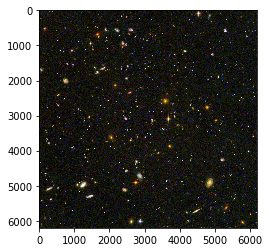

In [9]:
plt.imshow(universo)
plt.show()

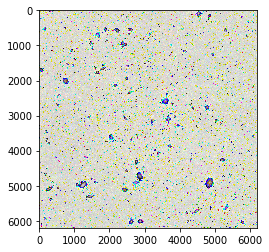

In [12]:
universo_filtro_1 = universo + 200
plt.imshow(universo_filtro_1)
plt.show()

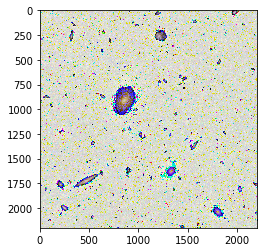

In [13]:
universo_parcial = universo_filtro_1[4000:,4000:,:]
plt.imshow(universo_parcial)
plt.show()

(400, 300, 3)


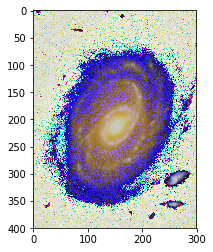

In [14]:
universo_parcial_dos = universo_parcial[700:1100,700:1000,:]
plt.imshow(universo_parcial_dos)
print(universo_parcial_dos.shape)
plt.show()

In [58]:
x,y,z = universo_parcial_dos.shape
longitud = x * y * z

indices = universo_parcial_dos.flatten().reshape(-1)
print(indices)

exp_1 = indices > 100

print(indices[exp_1])
print(indices[~exp_1])



[230 226 206 ... 221 224 214]
[230 226 206 ... 221 224 214]
[ 4 13 28 ... 13 40 39]


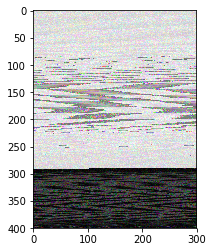

In [60]:
hot_cold = np.concatenate((indices[exp_1], indices[~exp_1]), axis=0)
hot_cold.shape = 400,300,3
plt.imshow(hot_cold)
plt.show()

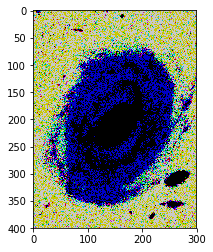

In [55]:
indices = universo_parcial_dos > 200
conf = indices * 200
plt.imshow(conf)
plt.show()

In [189]:
datos = np.zeros(120000, dtype={'names':('red','green','blue'), 'formats':('u4','u4','u4')})

In [190]:
print(universo_parcial_dos.shape)
reds = universo_parcial_dos[:,:,[0]].reshape(-1)
print(reds)

(400, 300, 3)
[230 238 233 ... 228 213 221]


In [191]:
greens = universo_parcial_dos[:,:,[1]].reshape(-1)
print(greens)

[226 233 211 ... 224 226 224]


In [195]:
blues = universo_parcial_dos[:,:,[2]].reshape(-1)
print(blues)

[206 235 215 ... 201 239 214]


In [196]:
datos['red'] = reds
datos['green'] = greens
datos['blue'] = blues

In [197]:
datos

array([(230, 226, 206), (238, 233, 235), (233, 211, 215), ...,
       (228, 224, 201), (213, 226, 239), (221, 224, 214)],
      dtype=[('red', '<u4'), ('green', '<u4'), ('blue', '<u4')])

(120000, 3)


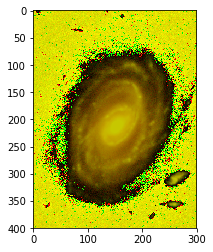

In [237]:
sin_azul = datos['blue'] * 0
nueva_imagen = np.stack((datos['red'],datos['green'],sin_azul), axis=1)
print(nueva_imagen.shape)
plt.imshow(nueva_imagen.reshape(400,300,3))
plt.show()

(120000, 3)


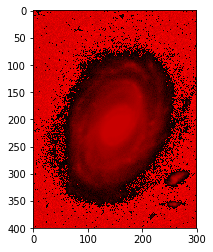

In [240]:
sin_verde_azul = datos['green'] * 0
nueva_imagen = np.stack((datos['red'],sin_verde,sin_azul), axis=1)
print(nueva_imagen.shape)
plt.imshow(nueva_imagen.reshape(400,300,3))
plt.show()

(120000, 3)


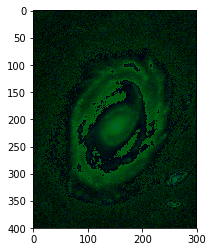

In [262]:
nuevo_verde = datos['green'] % 100
nuevo_azul = datos['blue'] % 40
sin_rojo = datos['red'] * 0
nueva_imagen = np.stack((sin_rojo,nuevo_verde,nuevo_azul), axis=1)
print(nueva_imagen.shape)
plt.imshow(nueva_imagen.reshape(400,300,3))
plt.show()